# Content-Based Recommendation Systems 

Note: For original code examples, please check the references. 



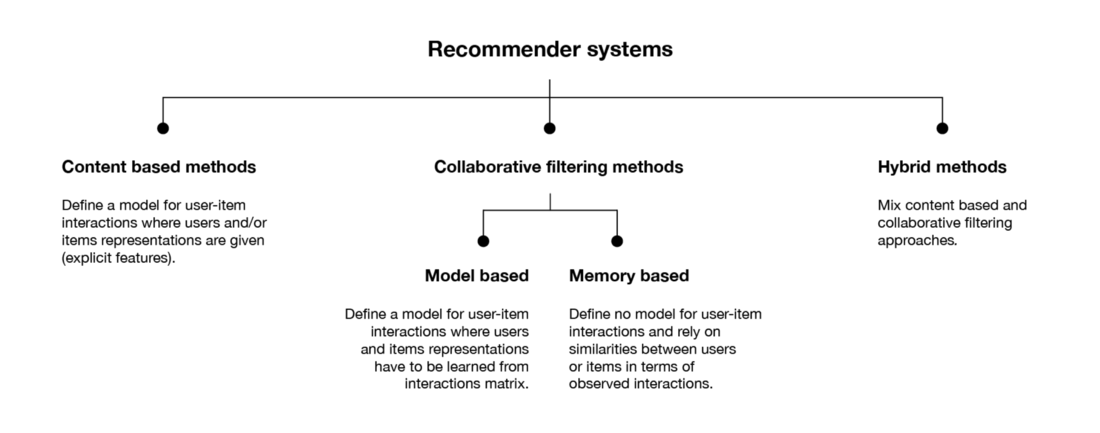

<b> 1) </b> No need for data on other users

<b> 2) </b> Able to recommend to users with unique tastes

If we use collabrative filtering we'll see that CF to make recommendation to a user we need find other similar users. The problem is that if there is a user with very unique or idiosyncratic tastes they may not be any other similar users whereas a content-based approach is able to deal naturally with this problem. 

<b> 3) </b> Able to recommend new & unpopular items. We don't need any ratings from users to build the item profile. Item profile depends entirely on the features of the items

<b> 4) </b>  We can provide an explanation or to the user for why a certain item was recommended. 

For instance, if you recommend a news article to user by using content based approach, you maybe able to say look in the past "user" spent a lot of time reading articles about tourism of turkey that's why I am recommending this article on tourism of turkey, too. 


<b> Disadvantages </b> 

* Finding the appropriate features is hard. For example, how do you find features for images or movies. For movies we are setting some features e.g. actors, directors, etc. but users are not very often loyal to specific actors or directors. This is the main reason that content-based approach is not more popular.


* Overspecialization. Never recommends items outside user's content profile. People might have multiple interests. Uable to exploit quality judgments of other users.


* Cold-start problem for new users. How to build a user profile?


For each item, crete an item profile. 

Profile is a set of features. 

Movie => author, title, actor, director, ... <br>
Images, videos => metadata, tags, ...<br>
People=> Set of friends

Let's look at special case of text.

Usual heuristic from text mining is <b> TF-IDF (Term Frequency * Inverse Doc Frequency </b>

In this area, how can we create item profile by using TF-IDF. Actually, TF-IDF is doing pick the important words but how ?

### TF-IDF


Term Frequency * Inverse Document

Term Frequency = Number of occurrences of a term in the
document (can be a simple count)

Inverse Document Frequency = How few documents contain this term
– Typically log (#documents / #documents with term)

#### Term Frequency

The number of time the feature j appers in in our document i

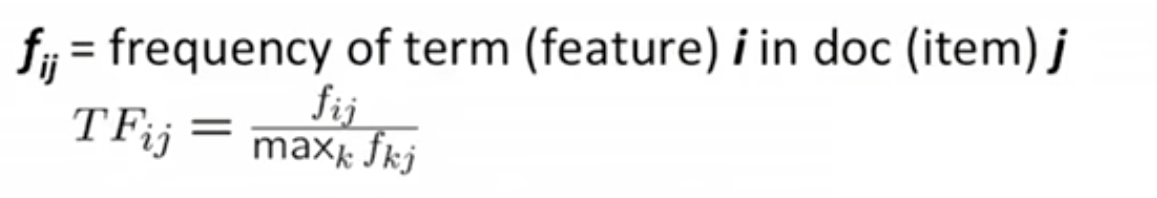

For example:

word is <i> "apple", and in our document apple appears five times (fij =5) and in another documents the total number of apple appearing is 23 times (maxkfjk)  </i>

Term frequency (TFij) = 5 / 23

#### Inverse Document Frequency

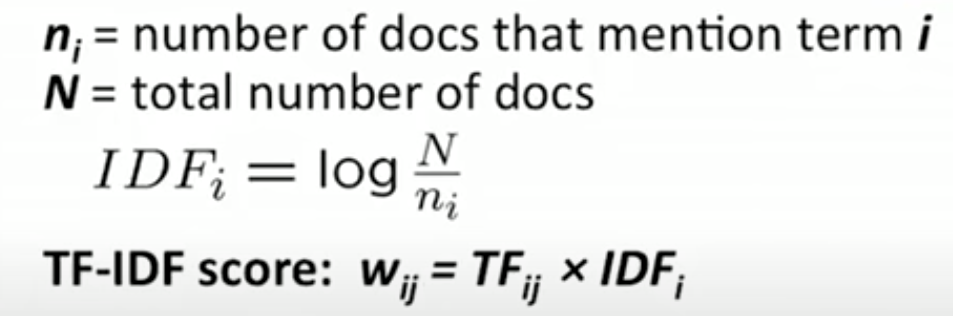


TFIDF concept can be used to create a
profile of a document/object. 

How?

<b> Doc profile:  </b>Set of words with highest TF-IDF scores together with their scores (Document profile)

<b> <i> These TFIDF profiles can be combined with
ratings to create user profiles </b> </i>

### Example 

<b> Sentence 1 : </b> The car is driven on the road.

<b> Sentence 2: </b> The truck is driven on the highway.

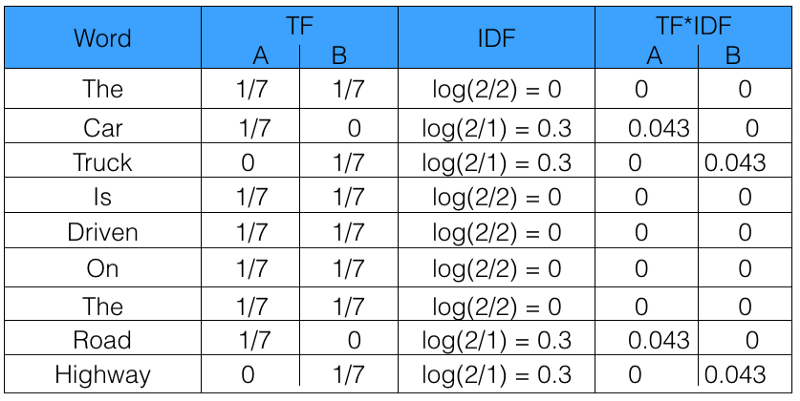

### Example Code for Calculating TFIDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

In [27]:
docs=["the house had a tiny little mouse", 
"the cat saw the mouse", 
"the mouse ran away from the house", 
"the cat finally ate the mouse", 
"the end of the mouse story"
]

In [28]:
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)

In [30]:
tfidf_vectorizer_vectors.shape

(5, 16)

In [31]:
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] 

In [34]:
import pandas as pd

df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), 
                  index=tfidf_vectorizer.get_feature_names(), 
                  columns=["tfidf"])

df.sort_values(by=["tfidf"],ascending=False)

,tfidf
had,0.493562
little,0.493562
tiny,0.493562
house,0.398203
mouse,0.235185
the,0.235185
ate,0.000000
away,0.000000
cat,0.000000
end,0.000000


<b> Note: We generally compute a weight to each word which signifies the importance of the word in the document and corpus.</b>

When we calculate IDF, it will be very low for the most occurring words such as stop words (because stop words such as “is” is present in almost all of the documents, and N/df will give a very low value to that word).

## Movie Recommendation by using Content-Based

In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns

ratings = pd.read_csv('dataset/Content_based_recommenders/ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])
users = pd.read_csv('dataset/Content_based_recommenders/users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])
movies = pd.read_csv('dataset/Content_based_recommenders/movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [51]:
ratings.sample(5)


,user_id,movie_id,rating
162980,1040,1923,5
559373,3436,1676,5
774058,4614,904,4
602961,3669,1552,3
803441,4810,2916,3


In [52]:

users.sample(5)

,user_id,gender,zipcode,age_desc,occ_desc
2957,2958,M,91911,25-34,executive/managerial
90,91,M,07650,35-44,executive/managerial
3472,3473,F,02472,35-44,self-employed
5954,5955,F,34952,25-34,executive/managerial
1668,1669,F,75006,25-34,technician/engineer


In [53]:
movies.sample(5)

,movie_id,title,genres
3519,3588,"King of Marvin Gardens, The (1972)",Crime|Drama
462,466,Hot Shots! Part Deux (1993),Action|Comedy|War
1366,1387,Jaws (1975),Action|Horror
1846,1915,Voyage to the Beginning of the World (1997),Drama
347,351,"Corrina, Corrina (1994)",Comedy|Drama|Romance


In [54]:
genre_popularity = (movies.genres.str.split('|')
                      .explode()
                      .value_counts()
                      .sort_values(ascending=False))
genre_popularity.head(10)

Drama         1603
Comedy        1200
Action         503
Thriller       492
Romance        471
Horror         343
Adventure      283
Sci-Fi         276
Children's     251
Crime          211
Name: genres, dtype: int64

### Using TFIDF

Where we have the product of the term frequency, i.e. the amount of times a given term (genre) occurs in a document (genres of a movie), times the right side factor, which basically scales the term frequency depending on the amount of times a given term appears in all documents (movies).

In [55]:

s = "Animation Children's Comedy"
tf_wrong = TfidfVectorizer(analyzer='word', ngram_range=(1,2))
tf_wrong.fit([s])
tf_wrong.get_feature_names()

['animation', 'animation children', 'children', 'children comedy', 'comedy']

In [56]:
[c for i in range(1,2) for c in combinations(s.split(), r=i)]

[('Animation',), ("Children's",), ('Comedy',)]

In [57]:

tf = TfidfVectorizer(analyzer=lambda s: (c for i in range(1,4)
                                             for c in combinations(s.split('|'), r=i)))
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(3883, 353)

In [67]:
pd.DataFrame(tfidf_matrix.todense(), columns=tf.get_feature_names(), index=movies.title).sample(20, axis=1).sample(5, axis=0)

,"(Adventure,)","(Action, Fantasy, Romance)","(Comedy, Sci-Fi, Western)","(Horror,)","(Crime, Drama)","(Adventure, Drama, Musical)","(Animation, Comedy)","(Action, Children's, War)","(Adventure, Comedy, Crime)","(Drama, Horror, Thriller)","(Adventure, Animation, Children's)","(Children's, Horror)","(Action, Adventure, Comedy)","(Comedy, Crime)","(Film-Noir,)","(Adventure, Romance, Sci-Fi)","(Adventure, Crime, Thriller)","(Adventure, Drama, Thriller)","(Children's, Sci-Fi, War)","(Adventure, Animation, Film-Noir)"
title,,,,,,,,,,,,,,,,,,,,
Who Framed Roger Rabbit? (1988),0.199814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.301627,0.0,0.0,0.0,0.0,0.473691
"English Patient, The (1996)",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Naked Gun 33 1/3: The Final Insult (1994),0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Days of Thunder (1990),0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [69]:
first_vector_tfidfvectorizer_movie=tfidf_matrix[0] 

df = pd.DataFrame(first_vector_tfidfvectorizer_movie.T.todense(), 
                  index=tf.get_feature_names(), 
                  columns=["tfidf"])

df.sort_values(by=["tfidf"],ascending=False)

,tfidf
"(Animation, Children's, Comedy)",0.497463
"(Animation, Comedy)",0.472775
"(Animation, Children's)",0.379538
"(Children's, Comedy)",0.371616
"(Animation,)",0.362160
...,...
"(Adventure, Drama, War)",0.000000
"(Adventure, Drama, Thriller)",0.000000
"(Adventure, Drama, Sci-Fi)",0.000000
"(Adventure, Drama, Romance)",0.000000


### Similarity between vectors

The next step will be to find similar vectors (movies). <font color='red'> Recall that we've encoded each movie's genre into its tf-idf representation</font>, <b> now we want to define a proximity measure.</b> A commonly used measure is the cosine similarity. 

This similarity measure owns its name to the fact that it equals to the cosine of the angle between the two vectors being compared. The lower the angle between two vectors, the higher the cosine will be, hence yielding a higher similarity factor





In [70]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)

In [71]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=movies['title'], columns=movies['title'])
print('Shape:', cosine_sim_df.shape)
cosine_sim_df.sample(5, axis=1).round(2)

Shape: (3883, 3883)


title,Double Happiness (1994),Knockout (1999),City of the Living Dead (Paura nella città dei morti viventi) (1980),Two Moon Juction (1988),"Name of the Rose, The (1986)"
title,,,,,
Toy Story (1995),0.00,0.00,0.0,0.00,0.0
Jumanji (1995),0.00,0.15,0.0,0.00,0.0
Grumpier Old Men (1995),0.00,0.00,0.0,0.00,0.0
Waiting to Exhale (1995),0.39,0.00,0.0,0.39,0.0
Father of the Bride Part II (1995),0.00,0.00,0.0,0.00,0.0
...,...,...,...,...,...
Meet the Parents (2000),0.00,0.00,0.0,0.00,0.0
Requiem for a Dream (2000),1.00,0.00,0.0,1.00,0.0
Tigerland (2000),1.00,0.00,0.0,1.00,0.0


Now we have to define some logic to find the highest weights or tf-idf scores for a given movie. For that I've defined the following function, which takes as input a given movie i, the similarity matrix M, the items dataframe and returns up to k recommendations:

In [72]:
def genre_recommendations(i, M, items, k=10):
    """
    Recommends movies based on a similarity dataframe

    Parameters
    ----------
    i : str
        Movie (index of the similarity dataframe)
    M : pd.DataFrame
        Similarity dataframe, symmetric, with movies as indices and columns
    items : pd.DataFrame
        Contains both the title and some other features used to define similarity
    k : int
        Amount of recommendations to return

    """
    ix = M.loc[:,i].to_numpy().argpartition(range(-1,-k,-1))
    closest = M.columns[ix[-1:-(k+2):-1]]
    closest = closest.drop(i, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [73]:
movies[movies.title.eq('2001: A Space Odyssey (1968)')]

,movie_id,title,genres
912,924,2001: A Space Odyssey (1968),Drama|Mystery|Sci-Fi|Thriller


In [74]:
genre_recommendations('2001: A Space Odyssey (1968)', cosine_sim_df, movies[['title', 'genres']])

,title,genres
0,"X-Files: Fight the Future, The (1998)",Mystery|Sci-Fi|Thriller
1,"Client, The (1994)",Drama|Mystery|Thriller
2,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller
3,Communion (1989),Drama|Sci-Fi|Thriller
4,Gattaca (1997),Drama|Sci-Fi|Thriller
5,"Thirteenth Floor, The (1999)",Drama|Sci-Fi|Thriller
6,Event Horizon (1997),Action|Mystery|Sci-Fi|Thriller
7,2010 (1984),Mystery|Sci-Fi
8,Stalker (1979),Mystery|Sci-Fi
9,Deep Impact (1998),Action|Drama|Sci-Fi|Thriller


### References

1) https://github.com/AlexanderNixon/Machine-learning-reads/blob/master/Content_based_recommenders.ipynb

2) https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.X89tQ9hKhPY